# Project: Investigate a Dataset: TMDB Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This Notebook is an analysis of TMDB of Data Set, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The data is downloaded form kaggle, and loaded into the notebook using pandas read_csv() function. Furthermore, Data is explored to decide on the steps needed for the cleaning process.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv("tmdb-movies.csv")
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Data Exploring

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

nearly 8000 movie do not have a homepage. which is very large ratio. this column needs to be dropped from the dataset.

In [4]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

all the data types are in the suitable format and no changes need to be done

In [5]:
data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.query('revenue == 0 or  budget == 0 or runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.000000e+00,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.000000e+00


In [9]:
data['director'].value_counts()

Woody Allen                        45
Clint Eastwood                     34
Martin Scorsese                    29
Steven Spielberg                   29
Ridley Scott                       23
Steven Soderbergh                  22
Ron Howard                         22
Joel Schumacher                    21
Brian De Palma                     20
Barry Levinson                     19
Wes Craven                         19
Tim Burton                         19
David Cronenberg                   18
Mike Nichols                       18
Rob Reiner                         18
John Carpenter                     18
Francis Ford Coppola               17
Walter Hill                        17
Robert Zemeckis                    17
Spike Lee                          17
Peter Hyams                        17
Norman Jewison                     17
Sidney Lumet                       17
Renny Harlin                       17
Tyler Perry                        17
Stephen Frears                     17
Oliver Stone

In [10]:
data['director'].nunique()

5067

To get the dataset ready, I am performing the following steps:
1. drop unneccessary columns
2. drop rows with null values
3. remove duplicated rows
4. split the data based on the movie genre
5. the zero values of budget, revenue, and runtime are left unchanged since they form nearly 7000 movie wich cannot be dropped easily
### Data Cleaning 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
columns = ['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'overview', 'keywords', 'release_date', 'revenue', 'budget']
data.drop(columns, axis = 1, inplace = True)

In [12]:
data.shape

(10866, 11)

In [13]:
data.dropna(axis = 0, inplace = True)

In [14]:
data.isnull().sum()

popularity              0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
print(data.shape)

(9773, 11)


In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.head()

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


Here, I divide the dataset based on the movie genre. The genre I use are, Action, Comedy, Science Fiction, Romance and Thriller

In [19]:
action = data[data['genres'].str.contains("Action")]
action = action.drop(columns = 'genres')
action.shape

(2235, 10)

In [20]:
comedy = data[data['genres'].str.contains("Comedy")]
comedy = comedy.drop(columns = 'genres')
comedy.shape

(3433, 10)

In [21]:
thriller = data[data['genres'].str.contains("Thriller")]
thriller = thriller.drop(columns = 'genres')
thriller.shape

(2746, 10)

In [22]:
scifi = data[data['genres'].str.contains("Science Fiction")]
scifi = scifi.drop(columns = 'genres')
scifi.shape

(1136, 10)

In [23]:
romance = data[data['genres'].str.contains("Romance")]
romance = romance.drop(columns = 'genres')
romance.shape

(1570, 10)

<a id='eda'></a>
## Exploratory Data Analysis

Through my EDA. I am going to study the Revenue Dependent variable. In my study, I am aiming to answer two main questions, Who are the best directors associated to each movie genre? and the second is, what other factors could affect the revenue of the movie?

### Research Question 1. Most Successful Directors in popular movie genres

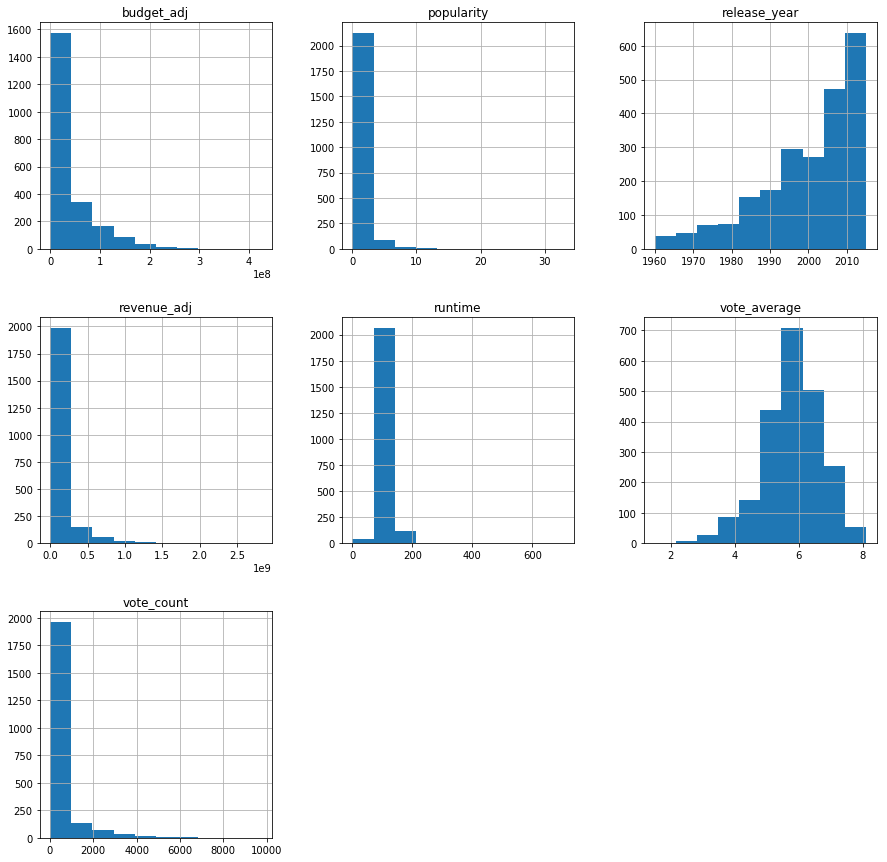

In [24]:
action.hist(figsize = (15, 15));

In [25]:
action.release_year.describe()

count    2235.000000
mean     1999.875168
std        12.927976
min      1960.000000
25%      1992.500000
50%      2003.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

Since I am interested in current directors, I filter the movies based on the recent movies. 1992 seems good since using which will capture nearly 75% of the data

In [26]:
action = action[action['release_year'] > 1992]

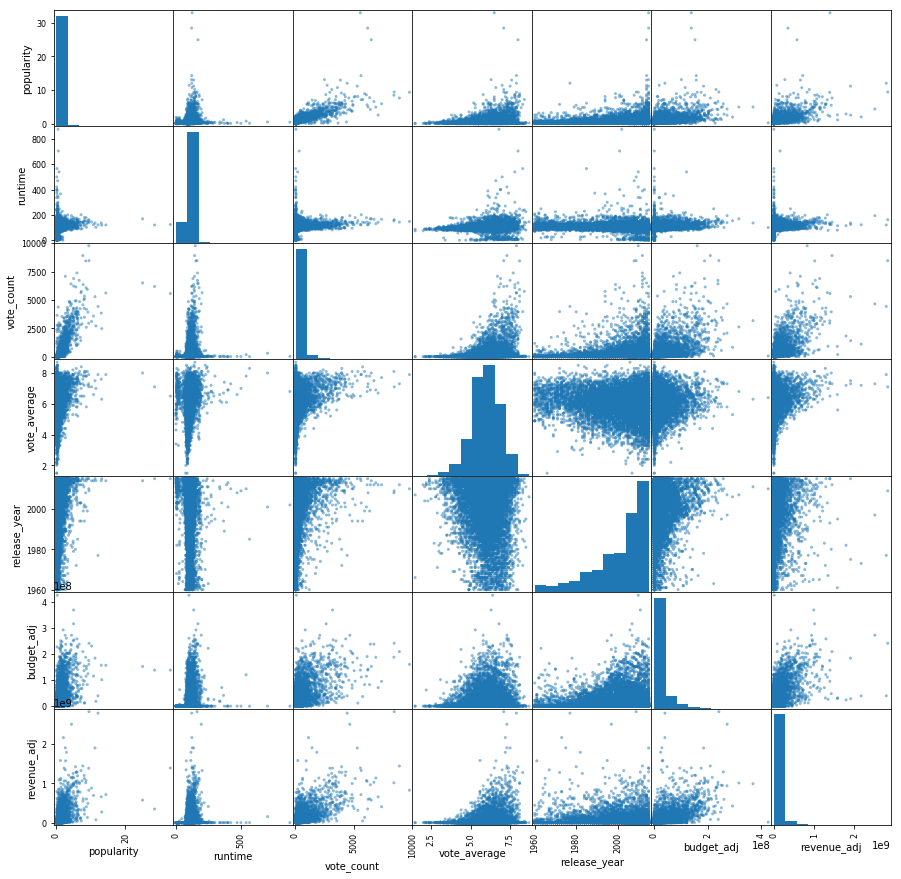

In [27]:
pd.plotting.scatter_matrix(data, figsize = (15,15));

I further filter the data based on Populrity, Vote_count, Vote Average, and revenue_adj. I calculate the value of the 75% of the movies using describe() functin and filter the dataset based on these calculations

In [28]:
pop = action.describe().loc['75%', 'popularity']
vote_count = action.describe().loc['75%', 'vote_count']
vote_average = action.describe().loc['75%', 'vote_average']
revenue_adj = action.describe().loc['75%', 'revenue_adj']


Top ten directors at Actin Movies whose movies made the highst voting rates

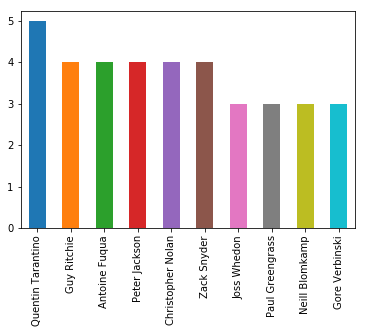

In [29]:
top_action_vote = action.query('vote_count > @vote_count and vote_average > @vote_average')
top_ten_vote = top_action_vote.director.value_counts()[:10]
top_ten_vote.plot('bar');

Top ten directors at Actin Movies whose movies made the highst revenues

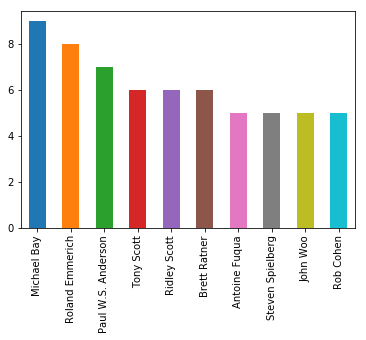

In [30]:
top_action_revenue = action[action['revenue_adj'] > revenue_adj]
top_ten_revenue = top_action_revenue.director.value_counts()[:10]
top_ten_revenue.plot('bar');

Top ten directors at Actin Movies whose movies made the highst Popularity Scores

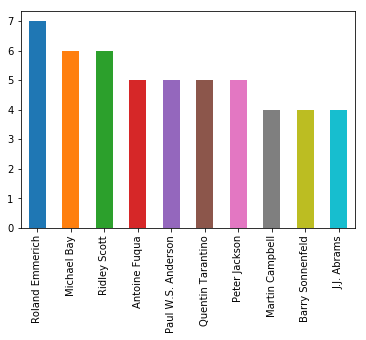

In [31]:
top_action_popularity = action[action['popularity'] > pop]
top_ten_pop = top_action_popularity.director.value_counts()[:10]
top_ten_pop.plot('bar');

Here I compute the union of the three set of directors to get the best directors making Actin Movies

In [32]:
pop = list(top_ten_pop.index)
revenue = list(top_ten_revenue.index)
vote = list(top_ten_pop.index)
union_action = pop + revenue + vote
union_action = list(set(union_action))
l = len(union_action)
print("final total {} action directors of higher achievements in populatity, revenue, and rating".format(l))
print("Directors are: ")
for i in range(l):
    print(union_action[i])

final total 15 action directors of higher achievements in populatity, revenue, and rating
Directors are: 
J.J. Abrams
Steven Spielberg
Ridley Scott
Quentin Tarantino
Peter Jackson
Barry Sonnenfeld
Roland Emmerich
Tony Scott
John Woo
Brett Ratner
Martin Campbell
Michael Bay
Antoine Fuqua
Rob Cohen
Paul W.S. Anderson


Same Analysis is repeated for Comedy and Thriller Movies

In [33]:
comedy.release_year.describe()

count    3433.000000
mean     2000.443635
std        12.134101
min      1960.000000
25%      1994.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

In [34]:
comedy = comedy[comedy['release_year'] > 1994]

pop = comedy.describe().loc['75%', 'popularity']
vote_count = comedy.describe().loc['75%', 'vote_count']
vote_average = comedy.describe().loc['75%', 'vote_average']
revenue_adj = comedy.describe().loc['75%', 'revenue_adj']



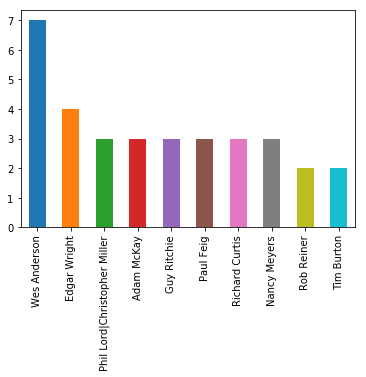

In [35]:
top_comedy_vote = comedy.query('vote_count > @vote_count and vote_average > @vote_average')
top_ten_vote = top_comedy_vote.director.value_counts()[:10]
top_ten_vote.plot('bar');

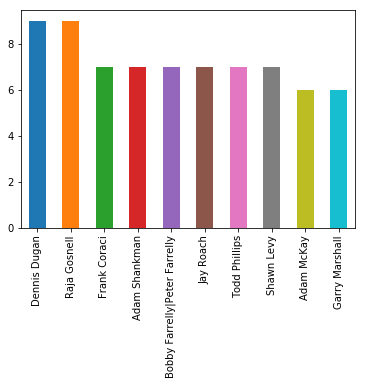

In [36]:
top_comedy_revenue = comedy[comedy['revenue_adj'] > revenue_adj]
top_ten_revenue = top_comedy_revenue.director.value_counts()[:10]
top_ten_revenue.plot('bar');

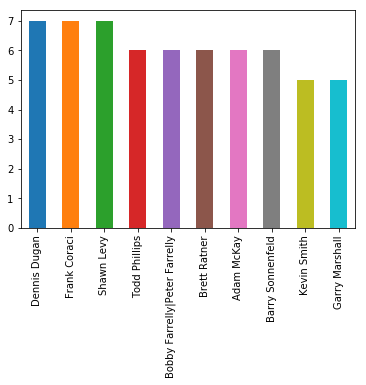

In [37]:
top_comedy_popularity = comedy[comedy['popularity'] > pop]
top_ten_pop = top_comedy_popularity.director.value_counts()[:10]
top_ten_pop.plot('bar');

In [38]:
pop = list(top_ten_pop.index)
revenue = list(top_ten_revenue.index)
vote = list(top_ten_pop.index)
union_comedy = pop + revenue + vote
union_comedy = list(set(union_comedy))
l = len(union_comedy)
print("final total {} comedy directors of higher achievements in populatity, revenue, and rating".format(l))
print("Directors are: ")
for i in range(l):
    print(union_comedy[i])

final total 13 comedy directors of higher achievements in populatity, revenue, and rating
Directors are: 
Todd Phillips
Garry Marshall
Frank Coraci
Adam McKay
Raja Gosnell
Barry Sonnenfeld
Shawn Levy
Kevin Smith
Jay Roach
Bobby Farrelly|Peter Farrelly
Adam Shankman
Brett Ratner
Dennis Dugan


In [39]:
thriller.release_year.describe()

count    2746.000000
mean     2001.442826
std        12.438051
min      1960.000000
25%      1995.000000
50%      2006.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

In [40]:
thriller = thriller[thriller['release_year'] > 1995]

pop = thriller.describe().loc['75%', 'popularity']
vote_count = thriller.describe().loc['75%', 'vote_count']
vote_average = thriller.describe().loc['75%', 'vote_average']
revenue_adj = thriller.describe().loc['75%', 'revenue_adj']



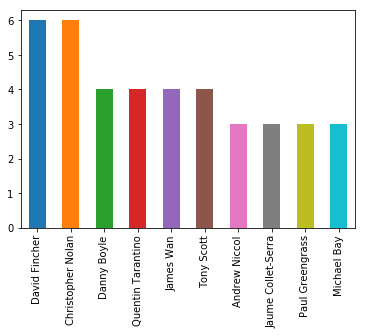

In [41]:
top_thriller_vote = thriller.query('vote_count > @vote_count and vote_average > @vote_average')
top_ten_vote = top_thriller_vote.director.value_counts()[:10]
top_ten_vote.plot('bar');

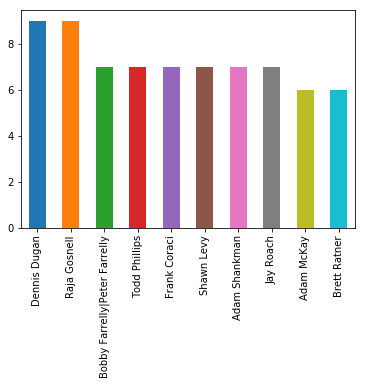

In [42]:
top_thriller_revenue = comedy[comedy['revenue_adj'] > revenue_adj]
top_ten_revenue = top_thriller_revenue.director.value_counts()[:10]
top_ten_revenue.plot('bar');

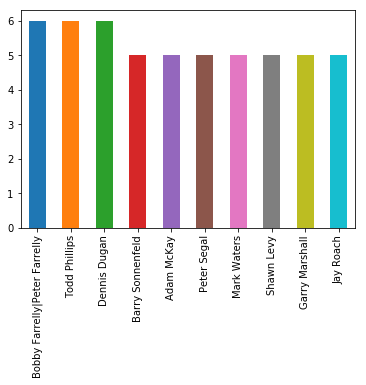

In [43]:
top_thriller_popularity = comedy[comedy['popularity'] > pop]
top_ten_pop = top_thriller_popularity.director.value_counts()[:10]
top_ten_pop.plot('bar');

In [44]:
pop = list(top_ten_pop.index)
revenue = list(top_ten_revenue.index)
vote = list(top_ten_pop.index)
union_thriller = pop + revenue + vote
union_thriller = list(set(union_thriller))
l = len(union_thriller)
print("final total {} thriller directors of higher achievements in populatity, revenue, and rating".format(l))
print("Directors are: ")
for i in range(l):
    print(union_thriller[i])

final total 14 thriller directors of higher achievements in populatity, revenue, and rating
Directors are: 
Todd Phillips
Garry Marshall
Frank Coraci
Adam McKay
Raja Gosnell
Barry Sonnenfeld
Mark Waters
Shawn Levy
Jay Roach
Bobby Farrelly|Peter Farrelly
Adam Shankman
Brett Ratner
Dennis Dugan
Peter Segal


### Research Question 2. Factors Affecting Revenue of Movies

In this question, I am going to do analysis to find factors that affect movies revenues. Factors I examine are:

A. Genre of Movie

B. Production Companies

A. Genre of Movie:

Again I examin the movie revenues associated with each movie genres. Genres I examine are:
1. Action
2. Romance
3. Comedy
4. Thriller
5. Science Fiction

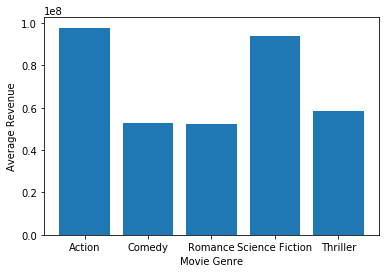

In [45]:
import matplotlib.pyplot as plt


genres = ['Action', 'Romance', 'Comedy', 'Thriller', 'Science Fiction']
means = list()
for genre in genres:
    means.append(data[data['genres'].str.contains(genre)].describe().loc['mean', 'revenue_adj'])
    
plt.bar(genres, means)
plt.ylabel('Average Revenue')
plt.xlabel("Movie Genre")
plt.show()

Some Movie Genres achieve more revenues than others

B. Production Companies

I first extract the top ten producing companies by the number of movies produced by these companies. Then I examine the mean budget and revenue for each producing country. 

In [46]:
top_ten = data.production_companies.value_counts()[:10]

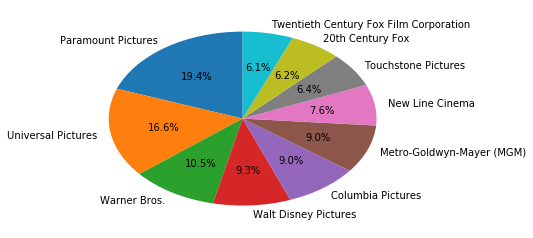

In [47]:
top_ten.plot('pie', label = '', autopct='%1.1f%%', startangle=90);

Ratio of movies produce by the top producing companies

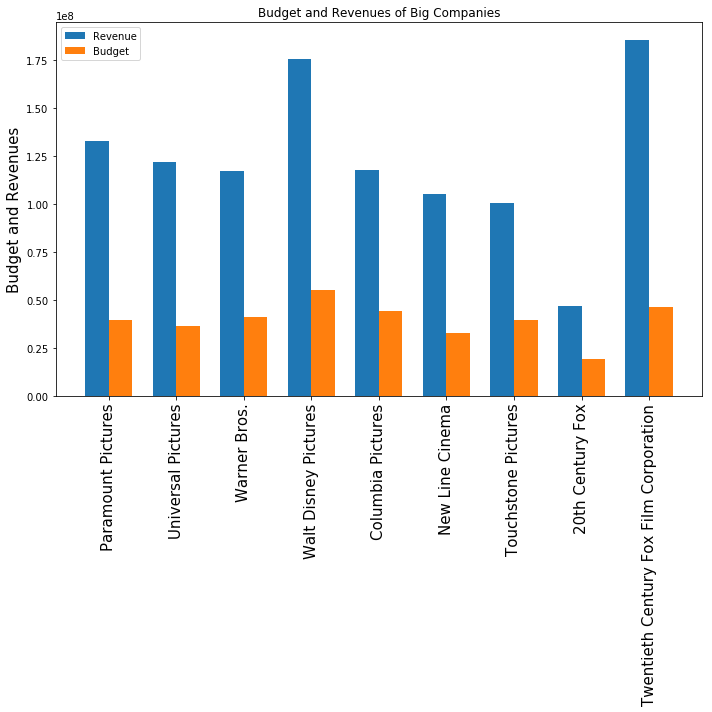

In [50]:
top_ten_companies = list(top_ten.index)
top_ten_companies.remove("Metro-Goldwyn-Mayer (MGM)") #since its revenue and budget are missing
revenue_means = list()
budget_means = list()
for company in top_ten_companies:
    revenue_means.append(data[data['production_companies'].str.contains(company)].describe().loc['mean', 'revenue_adj'])
    budget_means.append(data[data['production_companies'].str.contains(company)].describe().loc['mean', 'budget_adj'])


x = np.arange(len(top_ten_companies))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
rects1 = ax.bar(x - width/2, revenue_means, width, label='Revenue')
rects2 = ax.bar(x + width/2, budget_means, width, label='Budget')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Budget and Revenues', fontsize = 15)
ax.set_title('Budget and Revenues of Big Companies')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_companies, fontsize = 15)
ax.legend()





fig.tight_layout()

plt.show()

Through this bar chart, It can be noticed that there is a huge difference between the average budget and revenues achieved by 'Twentieth Century Fox Film Corporation'. I further examine the movie genres they produce

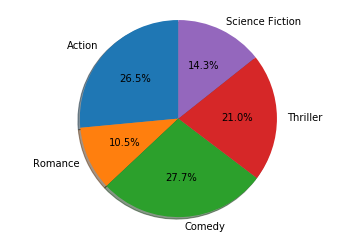

In [51]:
import matplotlib.pyplot as plt

genres = ['Action', 'Romance', 'Comedy', 'Thriller', 'Science Fiction']
#Data frame to hold the movies produced by Twentieth Century Fox Film Corporation
TC = data[data['production_companies'].str.contains("Twentieth Century Fox Film Corporation")]
total_movie_num = TC.shape[0]
occurence_num = list()

for genre in genres:
    occurence_num.append(TC[TC['genres'].str.contains(genre)].shape[0] / total_movie_num)


fig1, ax1 = plt.subplots()
ax1.pie(occurence_num,labels=genres, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<a id='conclusions'></a>
## Conclusions

A. Using this data set, I managed to extract top movie directors performing in certain movies genres

B. To Understand the factors that achieve higher movie revenues, I examine two factors:

B.1: Movie Genre: 

    I found that Action & Science fiction movies achieve more average revenues than others.

B.2: Producing Companies: 

    I first extracted the top ten companies producing more movies. Then I examine its average budget. Then, I    examined the company with the highst difference between the average budget and revenue to figure out the movie genres it mostly produce.